In [1]:
import warnings

In [2]:
import os

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from matplotlib import pyplot

In [7]:
import seaborn as sns

In [8]:
import tensorflow

In [9]:
print(tensorflow.__version__)

2.6.2


In [10]:
warnings.filterwarnings('ignore')

In [11]:
pd.options.display.max_columns=None

In [12]:
pd.options.display.float_format='{:.7f}'.format

In [13]:
pd.options.display.max_rows=None

In [14]:
#Reading the .h5 file and assign to a variable

In [15]:
import h5py

In [16]:
h5f=h5py.File('E:\\DIP_2024Fall\\aftermid\\Autonomous_Vehicles_SVHN_single_grey1.h5','r')

In [17]:
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [18]:
#Split the data into X_train,X_test,y_train,y_test

In [19]:
#load the training, test and validation set

In [20]:
X_train=h5f['X_train'][:]
y_train=h5f['y_train'][:]
X_test=h5f['X_test'][:]
y_test=h5f['y_test'][:]

In [21]:
#print shape of all the 4 data split into x,y,train,test to verify if x and y is in sync

In [22]:
X_train.shape

(42000, 32, 32)

In [23]:
X_test.shape

(18000, 32, 32)

In [24]:
y_train.shape

(42000,)

In [25]:
y_test.shape

(18000,)

In [26]:
#Visualiza the first 10 images in train data and print its corresponding labels

In [27]:
def img_lab(n):
    plt.figure(figsize=(n,1))
    for i in range(n):
        plt.subplot(1,n,i+1)
        plt.imshow(X_train[i],cmap='gray')
        plt.axis('off')
    plt.show()
    print('label for each of the above image:%s'%(y_train[0:n]))

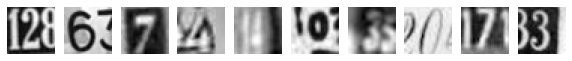

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


In [28]:
img_lab(10)

In [29]:
# Reshape all the images with appropriate shape update the data in same variable.

In [30]:
#Normalize the images i.e. Normalise the pixel values.

In [31]:
X_train.shape

(42000, 32, 32)

In [32]:
X_train=X_train.reshape(X_train.shape[0],1024,1)
X_test=X_test.reshape(X_test.shape[0],1024,1)

In [33]:
#normalize inputs from 0 -255 to 0 to 1

In [34]:
X_train=X_train/255.0
X_test=X_test/255.0

In [35]:
print('Resized Training set',X_train.shape,y_train.shape)
print('Resized Test set',X_test.shape,y_test.shape)

Resized Training set (42000, 1024, 1) (42000,)
Resized Test set (18000, 1024, 1) (18000,)


In [36]:
#Transform  Labels into format acceptable by Convolution Neural Network
#Print Total number of classes in the dataset

In [37]:
from tensorflow.keras.utils import to_categorical
#one hot encode outputs
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

#no. of classes
num_classes=y_test.shape[1]
print('THe number of classes in this dataset are:',num_classes)

THe number of classes in this dataset are: 10


In [38]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [39]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

def cnn_model():
    model = Sequential()
    # First convolutional layer
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(1024, 1)))
    model.add(MaxPooling1D(pool_size=2))
    
    # Second convolutional layer
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    # Third convolutional layer
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    # Flatten the output for the dense layers
    model.add(Flatten())
    
    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    
    # Output layer (adjust units based on the number of classes)
    model.add(Dense(10, activation='softmax'))  # Assuming 10 classes for classification
    
    return model



In [40]:
#build the model
model=cnn_model()

In [41]:
#train the classifier using the previously designed Architecture (Use best suitable parameters)

In [42]:
#compile model
sgd=Adam(lr=1e-3)
# model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
training_history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=300,verbose=2)

Epoch 1/10
140/140 - 75s - loss: 2.0292 - accuracy: 0.2683 - val_loss: 1.4660 - val_accuracy: 0.5678
Epoch 2/10
140/140 - 77s - loss: 1.4778 - accuracy: 0.5108 - val_loss: 1.1772 - val_accuracy: 0.6375
Epoch 3/10
140/140 - 77s - loss: 1.3071 - accuracy: 0.5651 - val_loss: 1.0408 - val_accuracy: 0.6728
Epoch 4/10
140/140 - 76s - loss: 1.2166 - accuracy: 0.5953 - val_loss: 0.9854 - val_accuracy: 0.6916
Epoch 5/10
140/140 - 78s - loss: 1.1508 - accuracy: 0.6172 - val_loss: 0.9435 - val_accuracy: 0.7041
Epoch 6/10
140/140 - 75s - loss: 1.1086 - accuracy: 0.6308 - val_loss: 0.9205 - val_accuracy: 0.7098
Epoch 7/10
140/140 - 77s - loss: 1.0690 - accuracy: 0.6411 - val_loss: 0.9055 - val_accuracy: 0.7145
Epoch 8/10
140/140 - 69s - loss: 1.0379 - accuracy: 0.6487 - val_loss: 0.8790 - val_accuracy: 0.7245
Epoch 9/10
140/140 - 70s - loss: 1.0131 - accuracy: 0.6615 - val_loss: 0.8537 - val_accuracy: 0.7303
Epoch 10/10
140/140 - 69s - loss: 0.9847 - accuracy: 0.6662 - val_loss: 0.8714 - val_accura

In [44]:
# Evaluate performance of the model with approriate metrics

In [45]:
# Final evalution of the model
scores=model.evaluate(X_test,y_test,verbose=0)
print('Loss:',scores[0])
print('Accuracy:',scores[1])

Loss: 0.8713622689247131
Accuracy: 0.7296666502952576


In [46]:
#plot the training loss,validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot

Text(0.5, 1.0, 'Training and validation loss')

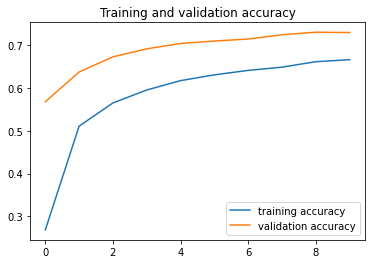

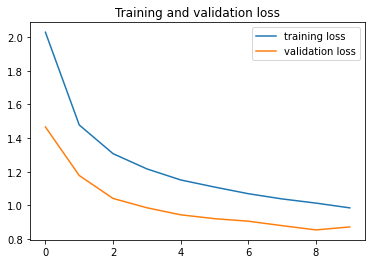

In [47]:
accuracy=training_history.history['accuracy']
val_accuracy=training_history.history['val_accuracy']
loss=training_history.history['loss']
val_loss=training_history.history['val_loss']


epochs=range(len(accuracy))

plt.plot(epochs,accuracy,label='training accuracy')
plt.plot(epochs,val_accuracy,label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.figure()

plt.plot(epochs,loss,label='training loss')
plt.plot(epochs,val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')